#**MODEL IMPLEMENTATION FOR STROKE PREDICTION**

1.   **Logistic Regression** - Dominic Almazan
2.   **Decision Tree** - Angela Taylan
1.   **Support Vector Machine (SVM)** - Ma. Leigh Nadyn Pajanustan
2.   **K-Nearest Neighbors (KNN)** - Samantha Reign Pajanustan

# **LOGISTIC REGRESSION**

**Importing Libraries**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_predict, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import learning_curve

In this part of my notebook, I imported all the libraries and modules needed to build and evaluate my Logistic Regression model. From `scikit-learn`, I brought in LogisticRegression, which is the core algorithm I’ll be using to perform the classification task. I also imported several tools from `sklearn.model_selection` such as KFold, `cross_val_predict, and cross_val_score `to handle cross-validation. With these, I can split my dataset into folds, generate predictions on unseen data, and compute accuracy scores across folds to check how stable and reliable my model is.

Since Logistic Regression is sensitive to feature scaling, I imported `StandardScaler` `from sklearn.preprocessing` to standardize my data so that each feature has a mean of 0 and a standard deviation of 1. For evaluation, I included `confusion_matrix` and `classification_report from sklearn.metrics`. These give me detailed insights into my model’s performance, showing me how many predictions are correct or incorrect, along with precision, recall, F1-score, and support for each class. For visualization, I imported `seaborn and matplotlib.pyplot` to plot graphs such as confusion matrices and learning curves, which help me better interpret results. I also included `pandas and numpy`, which are essential for data manipulation and numerical operations. Finally, I imported `learning_curve` from `sklearn.model_selection` so I can analyze how the model’s accuracy changes as the training set size increases, which is useful for identifying issues like underfitting or overfitting.

**Loading the Dataset**

In [ ]:
# Load dataset
df = pd.read_csv("stroke_clean.csv", delimiter=",")

In this step, I loaded my dataset called s`troke_clean.csv` into a pandas DataFrame named df. I used the `pd.read_csv()` function, which is specifically designed for reading CSV files, and I explicitly set `delimiter=","` to indicate that the values in the file are separated by commas, which is the standard format for CSV data. After executing this line, the dataset is stored in `df` as a structured table, making it easier to explore, clean if necessary, and prepare for training my Logistic Regression model.

**Splitting Features and Target**

In [ ]:
X = df.drop(columns=['stroke'])
y = df['stroke']

In this step, I separated the features from the target variable to prepare the data for modeling. The variable X contains all the columns in the dataset except for **'stroke'**, which means it holds the predictors the model will use to learn patterns, such as age, gender, and health conditions. On the other hand, y contains only the **'stroke'** column, which represents the outcome I want to predict  whether a person had a stroke **(0 = no, 1 = yes)**. This separation is necessary because machine learning models need to clearly distinguish between the inputs **(X)** used for learning and the output *(y)* they are expected to predict.

**Standardize the features**

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In this step, I applied standardization to my feature set **X** using `StandardScaler()`. Standardization works by transforming each feature so that it has a mean of 0 and a standard deviation of 1. To do this, I first created a scaler object and then used `fit_transform(X)`, which both learns the scaling parameters from the data and applies the transformation in one step. The transformed dataset is stored in X_scaled, which is the normalized version of my original features. This step is crucial because Logistic Regression (and many other machine learning algorithms) performs better when the features are on a similar scale. Without scaling, features with larger numeric ranges, such as glucose levels compared to age, could dominate the learning process and bias the model’s coefficients.

**Using the K-Fold setup**

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In this step, I set up K-Fold Cross Validation using KFold`(n_splits=5, shuffle=True, random_state=42)`. What this does is split my dataset into 5 folds, where in each iteration 4 folds are used for training and 1 fold is used for testing. This process repeats 5 times so that every fold is tested once, giving me a more reliable estimate of how well the model performs on unseen data. I enabled `shuffle=True` to make sure the data is randomized before splitting, which prevents biased folds if the dataset was ordered. Lastly, I fixed `random_state=42` so that the shuffling and results are consistent every time I run the code.

Logistic Regression model with hyperparameters

In [ ]:
log_reg = LogisticRegression(
    penalty='l2',       # Regularization (default: L2)
    C=0.01,              # Inverse of regularization strength
    solver='saga',     # Optimizer
    max_iter=500,      # Increase iterations for convergence
    random_state=42
)

print("=== Logistic Regression Evaluation ===")
print("Hyperparameters:", log_reg.get_params())

=== Logistic Regression Evaluation ===
Hyperparameters: {'C': 0.01, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 500, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'saga', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In this step, I set up my Logistic Regression model and carefully adjusted its hyperparameters instead of relying only on defaults. I applied **L2 regularization** by setting `penalty='l2'`, which helps control overfitting by keeping the model’s coefficients from becoming too large. I also set `C=0.01`, which means I am applying strong regularization (since C is the inverse of the regularization strength). This forces the model to stay simpler and avoid memorizing noise in the data.

For optimization, I used `solver='saga'` because it is more efficient for larger datasets and works well with different types of regularization, including **L1 and L2**. I also increased `max_iter=500` to give the solver more iterations to converge, since the default of 100 can sometimes cause warnings if the model doesn’t reach convergence. Lastly, I included `random_state=42` to make sure the training process is reproducible every time I run it. After defining the model, I printed out the hyperparameters using `log_reg.get_params()` as a quick check to confirm that the settings I applied were correctly recognized by the model.

**Cross-validation predictions and accuracy**

In [ ]:
y_pred = cross_val_predict(log_reg, X_scaled, y, cv=kf)
print("\nClassification Report:\n", classification_report(y, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96      5032
           1       0.99      0.93      0.96      4968

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000

Confusion Matrix:
 [[4999   33]
 [ 357 4611]]


In this part, I used `cross_val_predict` to generate predictions for my dataset using the Logistic Regression model. Unlike a simple train-test split, `cross_val_predict` runs the model across each fold defined in my K-Fold setup `(kf)` and gives me out-of-fold predictions for every sample. This means that every prediction is made on data that the model has not seen during training, which makes the evaluation much more reliable. The result is stored in` y_pred`, which I can then compare directly against the true labels in `y`.

After generating the predictions, I evaluated the performance of the model using two important metrics. The` classification_report` gives me precision, recall, F1-score, and support for each class, which provides a detailed view of how well the model handles both the positive and negative stroke cases. On the other hand, the `confusion_matrix` gives me a direct count of true positives, true negatives, false positives, and false negatives, allowing me to see where the model is making errors. By combining these two evaluation methods, I get both a detailed statistical breakdown and a straightforward visual representation of the model’s predictive ability.

**Accuracy Scores**

In [ ]:
test_acc = cross_val_score(log_reg, X_scaled, y, cv=kf)
train_acc = []
for train_idx, test_idx in kf.split(X_scaled):
    log_reg.fit(X_scaled[train_idx], y[train_idx])
    train_acc.append(log_reg.score(X_scaled[train_idx], y[train_idx]))

print(f"\nTraining Accuracy: {np.mean(train_acc):.4f}")
print(f"Testing Accuracy:  {np.mean(test_acc):.4f}")


Training Accuracy: 0.9612
Testing Accuracy:  0.9610


In this step, I evaluated the performance of my Logistic Regression model by comparing both training and testing accuracy using cross-validation. I started with` cross_val_score`, which calculates the accuracy on each test fold defined by my K-Fold setup and stores the results in `test_acc`. This gives me an average testing accuracy across all folds, which is a good estimate of how well the model generalizes to unseen data.

To check the training accuracy, I manually looped through the folds with `kf.split(X_scaled)`. For each fold, I trained the model on the training subset `(train_idx)` and then computed the accuracy on that same training set, storing the results in `train_acc`. After going through all the folds, I calculated the average training accuracy and compared it with the average testing accuracy. Printing both values side by side helps me detect if the model is overfitting (high training accuracy but low testing accuracy) or underfitting (both accuracies are low). This step gives me a clearer view of how well my model is learning versus how well it performs on unseen data.

Visualization (Confusion Matrxi,Learning Curve)

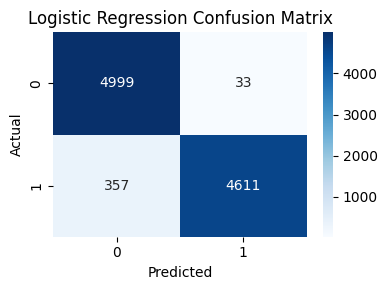

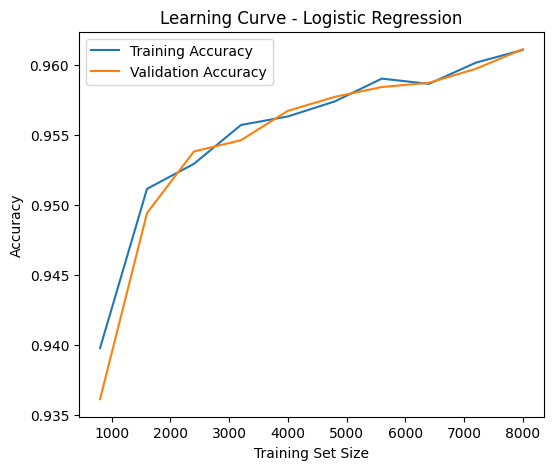

In [ ]:
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

train_sizes, train_scores, test_scores = learning_curve(
    log_reg, X_scaled, y, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(6,5))
plt.plot(train_sizes, train_mean, label="Training Accuracy")
plt.plot(train_sizes, test_mean, label="Validation Accuracy")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve - Logistic Regression")
plt.legend()
plt.show()

In this section, I first visualized the model’s confusion matrix using Seaborn’s **heatmap**. By passing `confusion_matrix(y, y_pred)` into the heatmap, I can clearly see how many predictions were correct (true positives and true negatives) and where the model made mistakes (false positives and false negatives). The` annot=True` parameter adds the actual counts to each cell, while the cmap='Blues' gives it a clean color gradient. This visualization makes it easier to interpret the model’s classification performance compared to just looking at raw numbers from the printed confusion matrix.

Next, I generated and plotted the learning curve for Logistic Regression using `learning_curve`. This curve shows how the model’s accuracy changes as the training set size increases. The `train_sizes` parameter ensures I gradually increase the training data from 10% to 100% in 10 steps. I then calculated the mean accuracy for both training `(train_mean)` and validation `(test_mean)` across folds and plotted them together. By comparing these two curves, I can assess if the model is underfitting, overfitting, or performing well. For example, a large gap between training and validation curves would indicate overfitting, while both curves staying low would suggest underfitting. This plot gives me an intuitive understanding of how well the model scales with more data.

Looking at the classification report, the model is performing very well overall. For class **0** (no stroke), the precision is **0.93** and recall is **0.99**, meaning the model correctly identifies almost all non-stroke cases but has a few false positives. For class **1** (stroke), the precision is extremely high at **0.99**, which means when the model predicts a stroke, it is almost always correct. The recall for class **1** is slightly lower at **0.93**, showing that the model misses some stroke cases, but the balance between precision and recall still leads to an F1-score of **0.96** for both classes. The overall accuracy is **96%**, which is strong and consistent across the macro and weighted averages, indicating that both classes are being treated fairly well despite any imbalance.

The confusion matrix further confirms this performance. Out of 10,000 samples, the model correctly classified the vast majority: 4,999 true negatives and 4,611 true positives. There were only 33 false positives (non-stroke cases predicted as stroke) and 357 false negatives (stroke cases missed). This trade-off is typical, and in medical contexts, missing positives (false negatives) is usually more critical than false positives, so it’s worth noting that improvement could focus on recall for the stroke class. Finally, the training accuracy **(96.12%)** and testing accuracy **(96.10%)** are nearly identical, which shows that the model is not overfitting  it generalizes well to unseen data. This level of stability and high performance suggests that the Logistic Regression with the chosen parameters is a strong baseline model for this dataset.

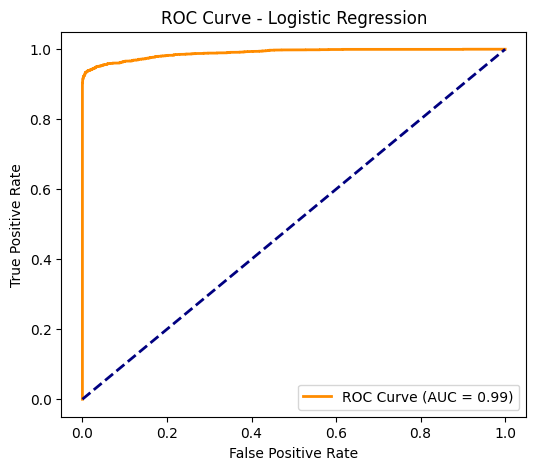

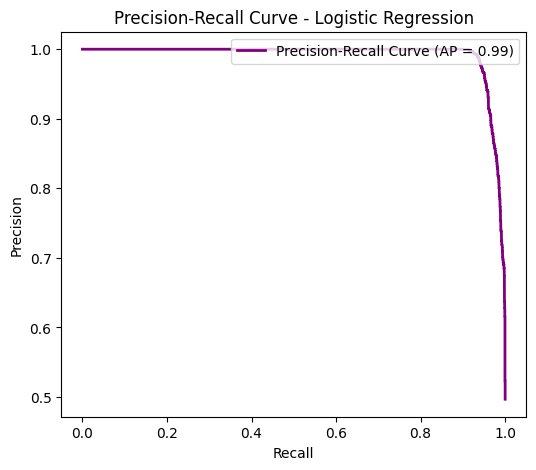

In [ ]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

# Refit model on the full dataset to get probability scores
log_reg.fit(X_scaled, y)
y_proba = log_reg.predict_proba(X_scaled)[:, 1]  # Probability for positive class (stroke=1)

# ================= ROC Curve ==================
fpr, tpr, thresholds = roc_curve(y, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend(loc="lower right")
plt.show()

# ================= Precision-Recall Curve ==================
precision, recall, thresholds_pr = precision_recall_curve(y, y_proba)
avg_precision = average_precision_score(y, y_proba)

plt.figure(figsize=(6,5))
plt.plot(recall, precision, color='purple', lw=2,
         label=f"Precision-Recall Curve (AP = {avg_precision:.2f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - Logistic Regression")
plt.legend(loc="upper right")
plt.show()

The `ROC Curve` was plotted to evaluate how well the logistic regression model distinguishes between stroke and non-stroke cases. It shows the trade-off between the true positive rate and false positive rate, with the `Area Under the Curve (AUC)` serving as a summary of the model’s discriminative ability. A curve closer to the top-left corner indicates stronger performance, while an AUC closer to 1.0 reflects a highly reliable classifier. Meanwhile, the `Precision-Recall Curve `was included because stroke datasets are often imbalanced, meaning there are fewer positive cases compared to negative ones. This curve highlights the relationship between precision, which measures the proportion of correctly predicted stroke cases, and recall, which measures how many actual stroke cases were detected. The `Average Precision (AP)` score summarizes this balance. Together, these visualizations provide a clearer understanding of the model’s effectiveness in detecting rare stroke cases beyond what accuracy alone can show.

**Actual Code**

=== Logistic Regression Evaluation ===
Hyperparameters: {'C': 0.01, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 500, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'saga', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96      5032
           1       0.99      0.93      0.96      4968

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000

Confusion Matrix:
 [[4999   33]
 [ 357 4611]]

Training Accuracy: 0.9612
Testing Accuracy:  0.9610


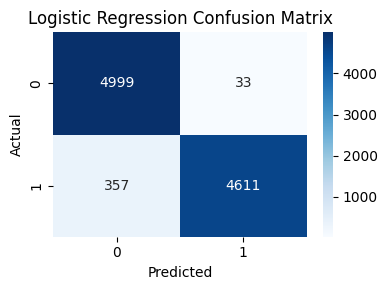

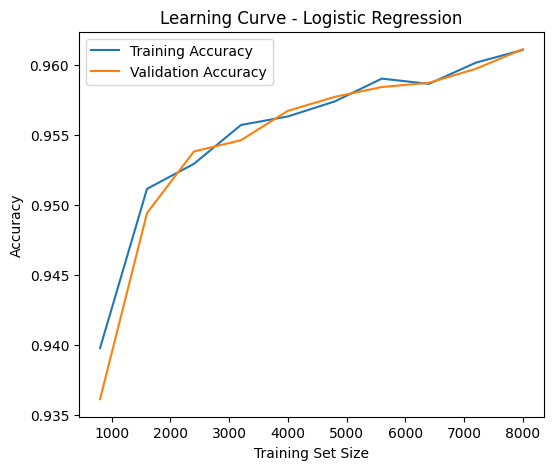

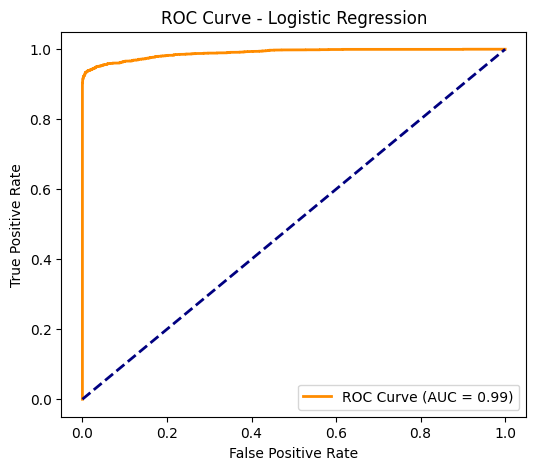

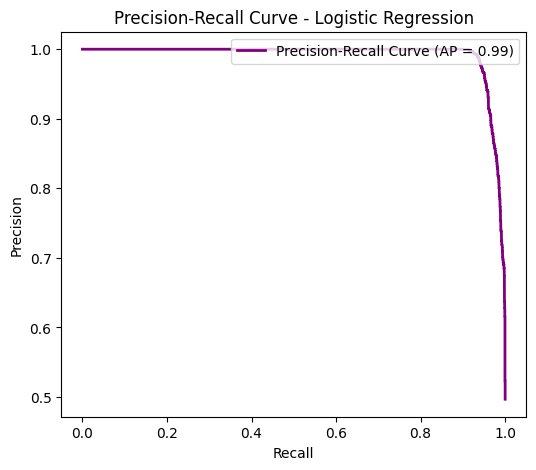

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_predict, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
# Load dataset
df = pd.read_csv("stroke_clean.csv", delimiter=",")

# Features and target
X = df.drop(columns=['stroke'])
y = df['stroke']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-Fold setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Logistic Regression model with hyperparameters
log_reg = LogisticRegression(
    penalty='l2',       # Regularization (default: L2)
    C=0.01,              # Inverse of regularization strength
    solver='saga',     # Optimizer
    max_iter=500,      # Increase iterations for convergence
    random_state=42
)

print("=== Logistic Regression Evaluation ===")
print("Hyperparameters:", log_reg.get_params())

# Cross-validation predictions and accuracy
y_pred = cross_val_predict(log_reg, X_scaled, y, cv=kf)
print("\nClassification Report:\n", classification_report(y, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y, y_pred))

# Accuracy scores
test_acc = cross_val_score(log_reg, X_scaled, y, cv=kf)
train_acc = []
for train_idx, test_idx in kf.split(X_scaled):
    log_reg.fit(X_scaled[train_idx], y[train_idx])
    train_acc.append(log_reg.score(X_scaled[train_idx], y[train_idx]))

print(f"\nTraining Accuracy: {np.mean(train_acc):.4f}")
print(f"Testing Accuracy:  {np.mean(test_acc):.4f}")

# Confusion Matrix Plot
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

train_sizes, train_scores, test_scores = learning_curve(
    log_reg, X_scaled, y, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(6,5))
plt.plot(train_sizes, train_mean, label="Training Accuracy")
plt.plot(train_sizes, test_mean, label="Validation Accuracy")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve - Logistic Regression")
plt.legend()
plt.show()

# Refit model on the full dataset to get probability scores
log_reg.fit(X_scaled, y)
y_proba = log_reg.predict_proba(X_scaled)[:, 1]  # Probability for positive class (stroke=1)

# ================= ROC Curve ==================
fpr, tpr, thresholds = roc_curve(y, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend(loc="lower right")
plt.show()

# ================= Precision-Recall Curve ==================
precision, recall, thresholds_pr = precision_recall_curve(y, y_proba)
avg_precision = average_precision_score(y, y_proba)

plt.figure(figsize=(6,5))
plt.plot(recall, precision, color='purple', lw=2,
         label=f"Precision-Recall Curve (AP = {avg_precision:.2f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - Logistic Regression")
plt.legend(loc="upper right")
plt.show()



# **DECISION TREES**


**Importing Libraries**

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

In this part of my notebook, I imported all the necessary libraries and modules to build and evaluate a Decision Tree classification model. From scikit-learn, I brought in DecisionTreeClassifier as the core algorithm, along with KFold, cross_val_predict, and cross_val_score to perform cross-validation, which helps me assess how well my model generalizes to unseen data. I also included tools like StandardScaler to scale my features, confusion_matrix and classification_report for detailed evaluation metrics, and visualization libraries such as seaborn and matplotlib to create plots like confusion matrices and ROC or precision-recall curves to better understand my model’s performance.

**Loading the Dataset**

In [ ]:
df = pd.read_csv("stroke_clean.csv", delimiter=",")

In this step it reads data from a CSV file named "stroke_clean.csv" into a pandas DataFrame called df, using a comma as the delimiter between values. Pandas by default treats the CSV file as comma-deliminated and therefore when it is explicitly stated that delimiting= comma, it is a given. This enables me to manipulate and analyze data on Python using robust DataFrame operations of pandas.

**Splitting Features and Target**

In [ ]:
X = df.drop(columns=['stroke'])
y = df['stroke']

This separates the dataset into features and the target variable. By using df.drop(columns=['stroke']), I create X containing all columns except the 'stroke' column, which holds the input features for the model. Then, I assign y to the 'stroke' column from df, which is the target variable I want to predict.This code separates the dataset into input features and the target variable for the classification task. By dropping the 'stroke' column from df, I create X, which holds all the independent variables used to predict. Then, I assign y to be just the 'stroke' column, which is the dependent variable or the label my model will learn to predict.

**Standardize the features**

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Here, I create an instance of StandardScaler, which will transform my feature data to have a mean of 0 and standard deviation of 1. By calling scaler.fit_transform(X), I fit the scaler to the data by computing the mean and standard deviation for each feature and then scale the features accordingly. This step is important because many machine learning algorithms perform better or converge faster when features are standardized to a similar scale.Here, I create an instance of StandardScaler, which standardizes my feature data by removing the mean and scaling to unit variance. Then, by applying scaler.fit_transform(X), I both fit the scaler on my data to compute the mean and standard deviation per feature and transform the features accordingly. This scaling step helps ensure that all input features contribute equally to the model training, improving performance and stability.

**Using the K-Fold setup**

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

This line creates a KFold cross-validator object with 5 splits, meaning the dataset will be divided into 5 folds for cross-validation. The shuffle=True argument ensures that the data is randomly shuffled before splitting into folds, which helps to reduce bias. By setting random_state=42, I ensure the shuffling and splitting are reproducible so that I can get consistent results across runs.

**Decision Tree model with hyperparameters**

In [ ]:
dt = DecisionTreeClassifier(
    random_state=42,
    max_depth=5,            # limit max depth
    min_samples_leaf=10,    # minimum samples required in a leaf node
    min_samples_split=20    # minimum samples to split an internal node
)

print("="*40)
print("=== Decision Tree Evaluation with Regularization ===")
print("="*40)

print("Hyperparameters:", dt.get_params())

=== Decision Tree Evaluation with Regularization ===
Hyperparameters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 10, 'min_samples_split': 20, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}


I initialize a DecisionTreeClassifier with specified hyperparameters to control its complexity and generalization ability. Setting random_state=42 ensures reproducibility, max_depth=5 limits the maximum depth of the tree to prevent overfitting, min_samples_leaf=10 requires each leaf node to have at least 10 samples to avoid too fine splits, and min_samples_split=20 sets the minimum number of samples needed to split an internal node. Then, I print a header for clarity, followed by printing the hyperparameters of the initialized decision tree model to verify the settings before training. These hyperparameters serve as regularization methods that help balance model complexity and prevent overfitting for better generalization on unseen data.

**Cross-validation predictions and accuracy**

In [ ]:
y_pred = cross_val_predict(dt, X_scaled, y, cv=kf)
print("\nClassification Report:\n", classification_report(y, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86      5032
           1       0.87      0.83      0.85      4968

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000

Confusion Matrix:
 [[4408  624]
 [ 843 4125]]


This step uses cross_val_predict to generate predictions for each sample in the dataset using a 5-fold cross-validation strategy defined by kf. For each fold, the decision tree model is trained on the training subset and then used to predict the labels of the held-out fold, ensuring each prediction is made on unseen data. I then print the classification report and confusion matrix comparing the true labels y to the predicted labels y_pred, providing detailed performance metrics and insight into how well the model classifies stroke cases across all folds.

**Accuracy Scores**

In [ ]:
test_acc = cross_val_score(dt, X_scaled, y, cv=kf)
train_acc = []
for train_idx, test_idx in kf.split(X_scaled):
    dt.fit(X_scaled[train_idx], y[train_idx])
    train_acc.append(dt.score(X_scaled[train_idx], y[train_idx]))

print(f"Training Accuracy: {np.mean(train_acc):.4f}")
print(f"Testing Accuracy:  {np.mean(test_acc):.4f}")

Training Accuracy: 0.8577
Testing Accuracy:  0.8533


I first use cross_val_score with the DecisionTreeClassifier, features, and target data over the previously defined KFold splits to compute testing accuracy for each fold. Then, I manually train the decision tree on each training fold from kf.split(X_scaled) and calculate the training accuracy for those folds, appending these scores to train_acc. Finally, I print the average training accuracy and average testing accuracy across all folds, which show close values (about 0.8577 training and 0.8533 testing), indicating that my model generalizes well without severe overfitting or underfitting

Visualization (Confusion Matrix,Learning Curve)


 Confusion Matrix Visualization


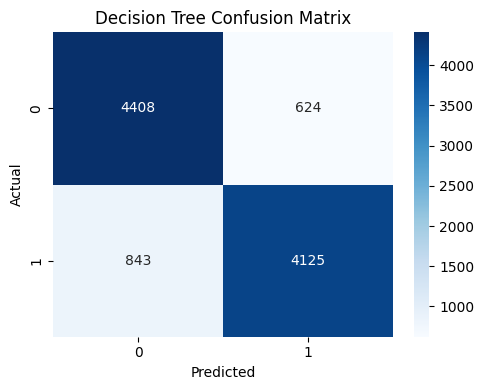


 ROC and Precision-Recall Curves


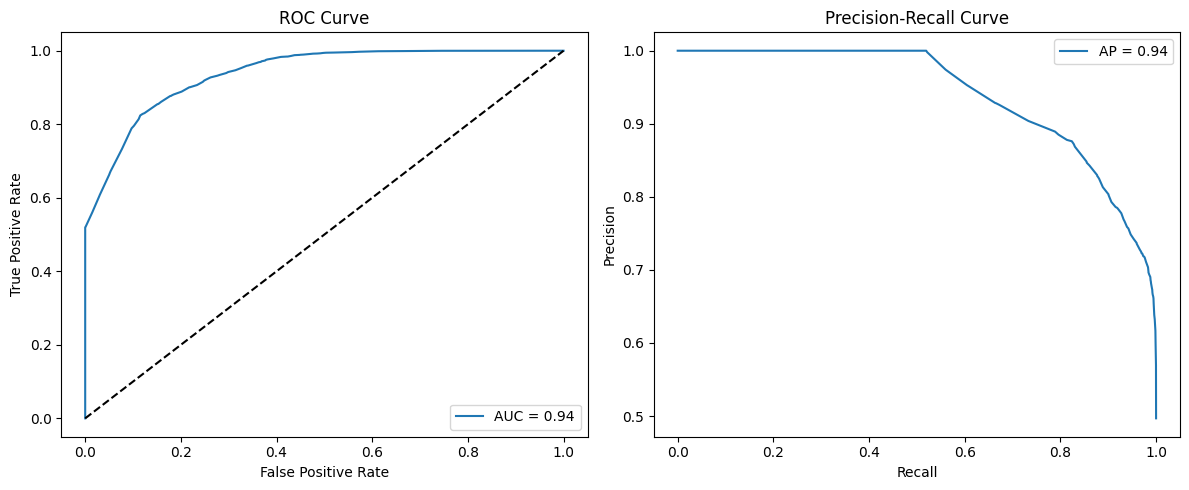

In [ ]:
print("\n" + "="*40)
print(" Confusion Matrix Visualization")
print("="*40)
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

print("\n" + "="*40)
print(" ROC and Precision-Recall Curves")
print("="*40)

y_scores = cross_val_predict(dt, X_scaled, y, cv=kf, method="predict_proba")[:, 1]

fpr, tpr, _ = roc_curve(y, y_scores)
roc_auc = auc(fpr, tpr)

precision, recall, _ = precision_recall_curve(y, y_scores)
avg_prec = average_precision_score(y, y_scores)

fig, axes = plt.subplots(1, 2, figsize=(12,5))

axes[0].plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
axes[0].plot([0, 1], [0, 1], 'k--')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('ROC Curve')
axes[0].legend(loc="lower right")

axes[1].plot(recall, precision, label=f'AP = {avg_prec:.2f}')
axes[1].set_xlabel('Recall')
axes[1].set_ylabel('Precision')
axes[1].set_title('Precision-Recall Curve')
axes[1].legend()

plt.tight_layout()
plt.show()

For this step, it first visualizes the confusion matrix of the Decision Tree classifier's predictions using a heatmap from Seaborn. It creates a 5x4 inch figure, plots the confusion matrix with annotated counts and a blue color gradient, and adds labels and title to clearly indicate predicted vs. actual classes.

Next, it calculates prediction probabilities using cross_val_predict with the "predict_proba" method, then computes and plots both the ROC curve (with AUC) and the Precision-Recall curve (with Average Precision) side-by-side using matplotlib. These plots help evaluate the classifier's performance across different classification thresholds, showing its ability to distinguish positive from negative classes in terms of false positives, true positives, precision, and recall. This comprehensive visualization aids in interpreting model performance beyond accuracy alone.

**Actual Code**

=== Decision Tree Evaluation with Regularization ===
Hyperparameters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 10, 'min_samples_split': 20, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86      5032
           1       0.87      0.83      0.85      4968

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000

Confusion Matrix:
 [[4408  624]
 [ 843 4125]]
Training Accuracy: 0.8577
Testing Accuracy:  0.8533

 Confusion Matrix Visualization


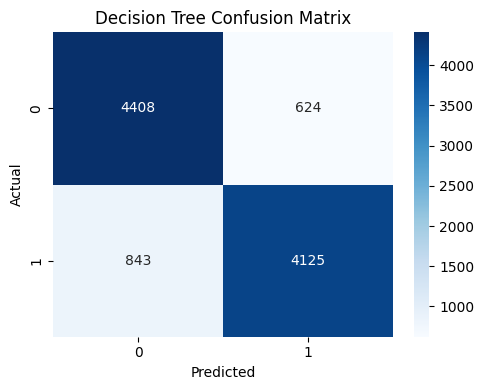


 ROC and Precision-Recall Curves


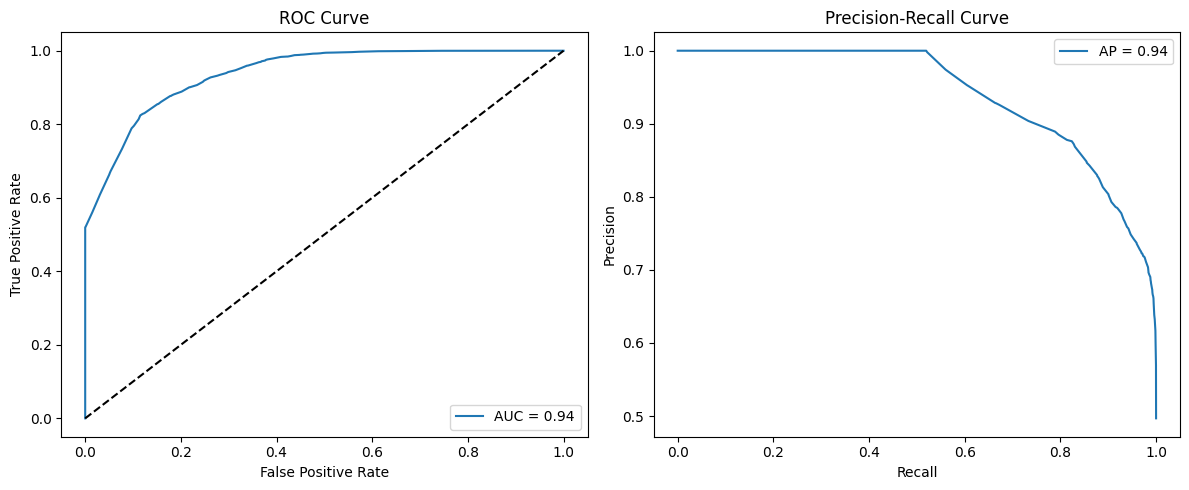

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

df = pd.read_csv("stroke_clean.csv", delimiter=",")

# Features and target
X = df.drop(columns=['stroke'])
y = df['stroke']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-Fold setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Decision Tree model with hyperparameters
dt = DecisionTreeClassifier(
    random_state=42,
    max_depth=5,            # limit max depth
    min_samples_leaf=10,    # minimum samples required in a leaf node
    min_samples_split=20    # minimum samples to split an internal node
)

print("="*40)
print("=== Decision Tree Evaluation with Regularization ===")
print("="*40)

print("Hyperparameters:", dt.get_params())

# Cross-validation predictions and accuracy
y_pred = cross_val_predict(dt, X_scaled, y, cv=kf)
print("\nClassification Report:\n", classification_report(y, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y, y_pred))

# Accuracy scores
test_acc = cross_val_score(dt, X_scaled, y, cv=kf)
train_acc = []
for train_idx, test_idx in kf.split(X_scaled):
    dt.fit(X_scaled[train_idx], y[train_idx])
    train_acc.append(dt.score(X_scaled[train_idx], y[train_idx]))

print(f"Training Accuracy: {np.mean(train_acc):.4f}")
print(f"Testing Accuracy:  {np.mean(test_acc):.4f}")

# Confusion Matrix Plot
print("\n" + "="*40)
print(" Confusion Matrix Visualization")
print("="*40)
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# ROC and PR Curves
print("\n" + "="*40)
print(" ROC and Precision-Recall Curves")
print("="*40)

y_scores = cross_val_predict(dt, X_scaled, y, cv=kf, method="predict_proba")[:, 1]

fpr, tpr, _ = roc_curve(y, y_scores)
roc_auc = auc(fpr, tpr)

precision, recall, _ = precision_recall_curve(y, y_scores)
avg_prec = average_precision_score(y, y_scores)

fig, axes = plt.subplots(1, 2, figsize=(12,5))

axes[0].plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
axes[0].plot([0, 1], [0, 1], 'k--')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('ROC Curve')
axes[0].legend(loc="lower right")

axes[1].plot(recall, precision, label=f'AP = {avg_prec:.2f}')
axes[1].set_xlabel('Recall')
axes[1].set_ylabel('Precision')
axes[1].set_title('Precision-Recall Curve')
axes[1].legend()

plt.tight_layout()
plt.show()

# **SUPPORT VECTOR MACHINES**

**The Breakdown**

In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import KFold, cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

df = pd.read_csv('/content/stroke_clean.csv')

First, we import all the tools we need. Pandas is used to load and manage the dataset, while sklearn provides the machine learning parts such as the Support Vector Machine model (SVC), cross-validation methods, and evaluation metrics. We also bring in seaborn and matplotlib for graphs, and numpy for number handling. StandardScaler is included so we can scale the data later, and the ROC and precision-recall functions are for plotting evaluation curves. Finally, the dataset is loaded using pandas. The file stroke_clean.csv contains patient information and a column that says whether they had a stroke or not.

In [ ]:
# Features and target
X = df.drop(columns=['stroke'])
y = df['stroke']

Then we separate the dataset into two parts. The variable X holds the features, which are the patient details like age, blood pressure, etc. The variable y holds only the target column stroke, which is either 0 (no stroke) or 1 (stroke). This separation is important because the model learns from the features in order to predict the target.

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

This step makes sure all the data is on the same scale. For example, age might be in the 40s or 60s, while other values like BMI or glucose may have different ranges. If we don’t standardize, larger numbers might dominate the model’s learning. StandardScaler transforms the features so that they are centered around zero and spread out in a similar way. The scaled data is saved in X_scaled.

In [ ]:
# K-Fold setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In this cell, we set up a way to test the model fairly. K-Fold cross-validation means the data will be split into 5 parts. The model trains on 4 parts and tests on the 1 remaining part, and this repeats until all parts have been used for testing once. Shuffling makes the data mixed up before splitting, and random_state makes sure the splits are the same every time we run it.

In [ ]:
# Model with hyperparameters
svm = SVC(
    C=1.0,
    kernel='rbf',
    gamma=0.1,
    probability=True   # needed for ROC/PR curves
)

This part creates the actual Support Vector Machine model. The parameter C=1.0 balances how strict the model is when drawing decision boundaries. The kernel is set to 'rbf', which is a type of function that works well when the data is not simple or linear. Gamma controls how much influence each training point has on the decision boundary. Finally, we set probability=True because later we want the model to give probability scores, not just class predictions, which are needed for plotting curves.

In [ ]:
print("="*40)
print("            SVM Evaluation       ")
print("="*40)

# Cross-validation predictions and accuracy
y_pred = cross_val_predict(svm, X_scaled, y, cv=kf)
print("\nClassification Report:\n", classification_report(y, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y, y_pred))

            SVM Evaluation       

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      5032
           1       0.99      0.95      0.97      4968

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

Confusion Matrix:
 [[5008   24]
 [ 261 4707]]


Here, the model is tested using cross-validation. cross_val_predict trains and tests the SVM across all folds and gives predictions for each patient. We then print a classification report, which shows values like precision, recall, and F1-score for each class. These numbers explain how good the model is at correctly predicting stroke and no stroke. We also print a confusion matrix, which shows the counts of correct and wrong predictions in a table format.

In [ ]:
# Accuracy scores
test_acc = cross_val_score(svm, X_scaled, y, cv=kf)
train_acc = []
for train_idx, test_idx in kf.split(X_scaled):
    svm.fit(X_scaled[train_idx], y[train_idx])
    train_acc.append(svm.score(X_scaled[train_idx], y[train_idx]))

print(f"Training Accuracy: {np.mean(train_acc):.4f}")
print(f"Testing Accuracy:  {np.mean(test_acc):.4f}")

Training Accuracy: 0.9757
Testing Accuracy:  0.9715


This part checks how accurate the model is. First, it calculates testing accuracy with cross-validation using cross_val_score. Then, in a loop, it trains the model on each training fold and records how accurate it is on the training data. Finally, it prints the average training accuracy and testing accuracy. Comparing these two numbers tells us if the model is overfitting. If training accuracy is much higher than testing accuracy, the model might be memorizing rather than generalizing.


   📊 Confusion Matrix Visualization


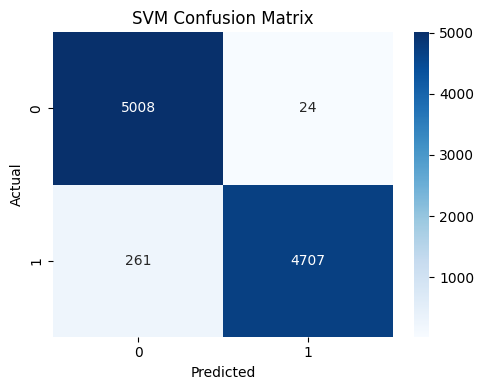

In [ ]:
# Confusion Matrix Plot
print("\n" + "="*40)
print("   📊 Confusion Matrix Visualization")
print("="*40)

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

This section draws a heatmap for the confusion matrix using Seaborn. The numbers are displayed inside the boxes, and the color shading helps us see where the model did well or poorly. The x-axis shows the predicted class, and the y-axis shows the actual class. This visual makes it easier to quickly spot errors and the balance of predictions.

In [ ]:
y_scores = cross_val_predict(svm, X_scaled, y, cv=kf, method="predict_proba")[:, 1]

# ROC
fpr, tpr, _ = roc_curve(y, y_scores)
roc_auc = auc(fpr, tpr)

# Precision-Recall
precision, recall, _ = precision_recall_curve(y, y_scores)
avg_prec = average_precision_score(y, y_scores)

Now we prepare the values for two important evaluation curves. By using predict_proba, we get probability scores for stroke predictions. These scores are used to build the ROC curve and the precision-recall curve. The ROC curve compares the true positive rate against the false positive rate and we calculate the area under it (AUC) to summarize performance. The precision-recall curve shows how well the model balances between catching positive cases (recall) and being correct about positive predictions (precision). The average precision score gives one number that summarizes this curve.


  📈 ROC and Precision-Recall Curves


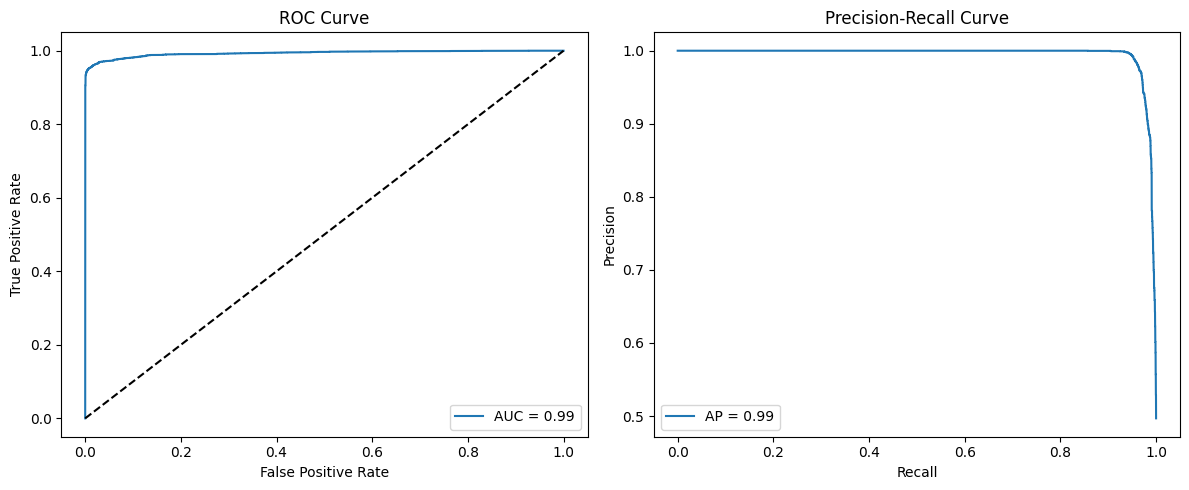

In [ ]:
# ROC and PR Curves
print("\n" + "="*40)
print("  📈 ROC and Precision-Recall Curves")
print("="*40)

# Side by side plots
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# ROC curve
axes[0].plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
axes[0].plot([0, 1], [0, 1], 'k--')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('ROC Curve')
axes[0].legend(loc="lower right")

# Precision-Recall curve
axes[1].plot(recall, precision, label=f'AP = {avg_prec:.2f}')
axes[1].set_xlabel('Recall')
axes[1].set_ylabel('Precision')
axes[1].set_title('Precision-Recall Curve')
axes[1].legend()

plt.tight_layout()
plt.show()

Finally, we make the plots. Two graphs are shown side by side. On the left, the ROC curve is plotted. The closer the curve is to the top-left corner, the better the model is at separating stroke and non-stroke cases. On the right, the precision-recall curve is drawn. This graph is especially useful for imbalanced datasets like stroke prediction, where strokes (positive class) are much fewer than non-strokes. Together, these plots give us a clearer idea of the model’s ability beyond just accuracy.

=========================================================================================================

**Full Code**

            SVM Evaluation       

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      5032
           1       0.99      0.95      0.97      4968

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

Confusion Matrix:
 [[5008   24]
 [ 261 4707]]

Training Accuracy: 0.9757
Testing Accuracy:  0.9715

   📊 Confusion Matrix Visualization


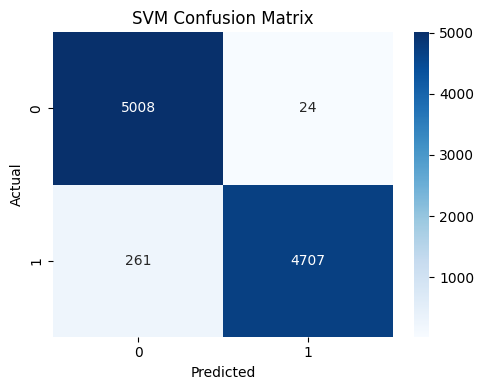


  📈 ROC and Precision-Recall Curves


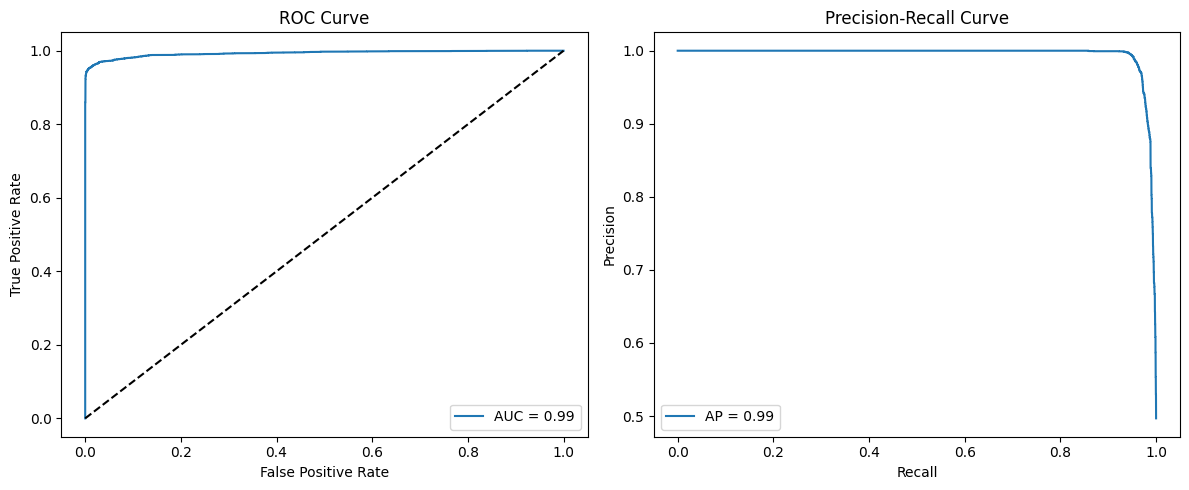

In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import KFold, cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

df = pd.read_csv('/content/stroke_clean.csv')

# Features and target
X = df.drop(columns=['stroke'])
y = df['stroke']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-Fold setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Model with hyperparameters
svm = SVC(
    C=1.0,
    kernel='rbf',
    gamma=0.1,
    probability=True   # needed for ROC/PR curves
)

print("="*40)
print("            SVM Evaluation       ")
print("="*40)

# Cross-validation predictions and accuracy
y_pred = cross_val_predict(svm, X_scaled, y, cv=kf)
print("\nClassification Report:\n", classification_report(y, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y, y_pred))

# Accuracy scores
test_acc = cross_val_score(svm, X_scaled, y, cv=kf)
train_acc = []
for train_idx, test_idx in kf.split(X_scaled):
    svm.fit(X_scaled[train_idx], y[train_idx])
    train_acc.append(svm.score(X_scaled[train_idx], y[train_idx]))

print(f"\nTraining Accuracy: {np.mean(train_acc):.4f}")
print(f"Testing Accuracy:  {np.mean(test_acc):.4f}")

# Confusion Matrix Plot
print("\n" + "="*40)
print("   📊 Confusion Matrix Visualization")
print("="*40)

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

y_scores = cross_val_predict(svm, X_scaled, y, cv=kf, method="predict_proba")[:, 1]

# ROC
fpr, tpr, _ = roc_curve(y, y_scores)
roc_auc = auc(fpr, tpr)

# Precision-Recall
precision, recall, _ = precision_recall_curve(y, y_scores)
avg_prec = average_precision_score(y, y_scores)

# ROC and PR Curves
print("\n" + "="*40)
print("  📈 ROC and Precision-Recall Curves")
print("="*40)

# Side by side plots
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# ROC curve
axes[0].plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
axes[0].plot([0, 1], [0, 1], 'k--')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('ROC Curve')
axes[0].legend(loc="lower right")

# Precision-Recall curve
axes[1].plot(recall, precision, label=f'AP = {avg_prec:.2f}')
axes[1].set_xlabel('Recall')
axes[1].set_ylabel('Precision')
axes[1].set_title('Precision-Recall Curve')
axes[1].legend()

plt.tight_layout()
plt.show()

#**K-NEAREST NEIGHBORS**

This code block imports the essential libraries for building and evaluating a K-Nearest Neighbors (KNN) model. The KNeighborsClassifier from sklearn.neighbors is used to create the KNN model itself. To perform cross-validation, it includes KFold, cross_val_predict, and cross_val_score from sklearn.model_selection. For evaluating model performance, functions like confusion_matrix, classification_report, roc_curve, and roc_auc_score are brought in from sklearn.metrics. The StandardScaler from sklearn.preprocessing is added to normalize feature values before training. For visualization, seaborn and matplotlib.pyplot are used, especially for plotting confusion matrices and performance curves. Finally, numpy and pandas are imported to manage numerical computations and dataset handling.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

This line uses pandas to read a CSV file and store it in a variable. The function pd.read_csv() is used to open the file named "stroke_clean.csv". The part delimiter="," tells pandas that the values in the file are separated by commas. The result is saved in df, which is a table structure in pandas where the data can be viewed and worked with.

In [ ]:
df = pd.read_csv("stroke_clean.csv", delimiter=",")

These two lines split the dataset into inputs and output. In the first line, X = df.drop(columns=['stroke']) works by taking the DataFrame df and removing the column named 'stroke'. This leaves all the other columns, which are stored in X as the features the model will learn from. In the second line, y = df['stroke'] works by selecting only the 'stroke' column from df. This column is saved in y, which becomes the target variable the model will try to predict. Together, X holds the information used for prediction, while y holds the actual labels to compare against.

In [ ]:
# Features and target
X = df.drop(columns=['stroke'])
y = df['stroke']

These lines prepare the feature values so they are on the same scale. The first line, scaler = StandardScaler(), creates a scaler object from scikit-learn that will standardize the data. Standardizing means shifting the values so each feature has a mean of 0 and a standard deviation of 1. The second line, X_scaled = scaler.fit_transform(X), works by first learning the mean and standard deviation of each column in X (this is the fit part), then applying the transformation using those values (this is the transform part). The result is stored in X_scaled, which contains the standardized version of the features and is ready to be used by the model.

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

This line sets up the rules for splitting the dataset into folds for cross-validation. The function KFold() is used to divide the data into 5 parts (n_splits=5). The option shuffle=True means the data will be mixed before splitting, so each fold has a random mix of samples instead of being in order. The random_state=42 makes sure the shuffling is done the same way every time the code runs, so the results are consistent. The setup is saved in kf, which can later be used to guide the cross-validation process.

In [ ]:
# K-Fold setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)

These lines create and describe a K-Nearest Neighbors (KNN) model with specific settings. The first part, knn = KNeighborsClassifier(...), builds the model. The parameter n_neighbors=5 means the model will look at the 5 closest neighbors when making predictions. The weights='uniform' option means all neighbors contribute equally to the decision. The algorithm='auto' lets scikit-learn decide the most efficient method to find neighbors. The p=2 means the model will use Euclidean distance to measure how close points are.

The print("=== KNN Evaluation ===") line just displays a label in the output for clarity. The next line, print("Hyperparameters:", knn.get_params()), prints the current settings (hyperparameters) of the model, so you can see exactly how the KNN classifier was configured.

In [ ]:
# Model with 4 hyperparameters
knn = KNeighborsClassifier(
    n_neighbors=5,
    weights='uniform',
    algorithm='auto',
    p=2
)

print("=== KNN Evaluation ===")
print("Hyperparameters:", knn.get_params())

=== KNN Evaluation ===
Hyperparameters: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


These lines perform cross-validation and show how well the model predicts. The first line, y_pred = cross_val_predict(knn, X_scaled, y, cv=kf), works by training the KNN model multiple times using the folds defined in kf. For each fold, the model is trained on the other folds and tested on the current fold. The predictions from all folds are combined and stored in y_pred.

The next line, print("\nClassification Report:\n", classification_report(y, y_pred)), prints a summary of performance, including precision, recall, f1-score, and accuracy for each class.

In [ ]:
# Accuracy scores
test_acc = cross_val_score(knn, X_scaled, y, cv=kf)
train_acc = []
for train_idx, test_idx in kf.split(X_scaled):
    knn.fit(X_scaled[train_idx], y[train_idx])
    train_acc.append(knn.score(X_scaled[train_idx], y[train_idx]))

print(f"\nTraining Accuracy: {np.mean(train_acc):.4f}")
print(f"Testing Accuracy:  {np.mean(test_acc):.4f}")


Training Accuracy: 0.9797
Testing Accuracy:  0.9677


This section generates a visualization of the confusion matrix to make model performance easier to interpret. The figure size is first set with plt.figure(figsize=(4, 3)). Using Seaborn’s heatmap, the confusion matrix is displayed as a color-coded grid where the actual values (y) are compared against the predicted values (y_pred). The numbers inside each cell (annot=True) show the exact counts, formatted as whole numbers (fmt='d'), while the blue color map (cmap='Blues') highlights the differences visually.

To improve readability, a title and axis labels are added: KNN Confusion Matrix as the title, Predicted on the x-axis, and Actual on the y-axis. The plt.tight_layout() function ensures elements don’t overlap, and plt.show() renders the final heatmap.


=== Confusion Matrix Visualization ===



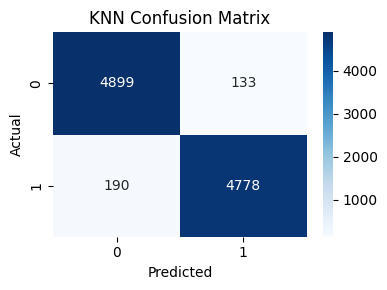

In [ ]:
# Confusion Matrix Plot
print("\n=== Confusion Matrix Visualization ===\n")
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

This code draws the ROC curve to evaluate the KNN model. First, it calculates the predicted probabilities for the stroke class using cross_val_predict(..., method='predict_proba'). From these probabilities, roc_curve computes the false positive rate (FPR) and true positive rate (TPR) at different thresholds, while roc_auc_score gives the AUC value, which summarizes how well the model performs overall.

The plot shows the ROC curve in blue with its AUC score as a label. A dashed gray diagonal line is also drawn to represent random guessing. Axis labels, a title, and a legend make the chart easier to read, and finally plt.show() displays the result.


=== ROC Curve Visualization ===



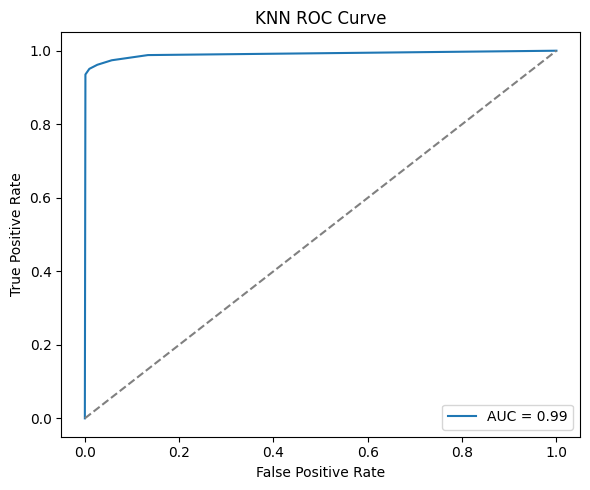

In [ ]:
# ROC Curve with AUC
print("\n=== ROC Curve Visualization ===\n")
y_prob = cross_val_predict(knn, X_scaled, y, cv=kf, method='predict_proba')[:, 1]
fpr, tpr, thresholds = roc_curve(y, y_prob)
auc_score = roc_auc_score(y, y_prob)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.title("KNN ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

**ACTUAL CODE**

=== KNN Evaluation ===
Hyperparameters: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97      5032
           1       0.97      0.96      0.97      4968

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

Confusion Matrix:
 [[4899  133]
 [ 190 4778]]

Training Accuracy: 0.9797
Testing Accuracy:  0.9677

=== Confusion Matrix Visualization ===



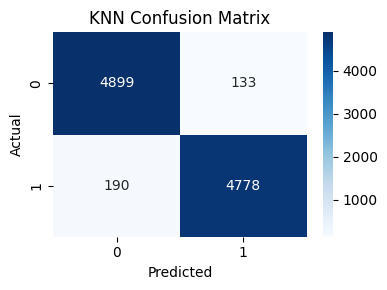


=== ROC Curve Visualization ===



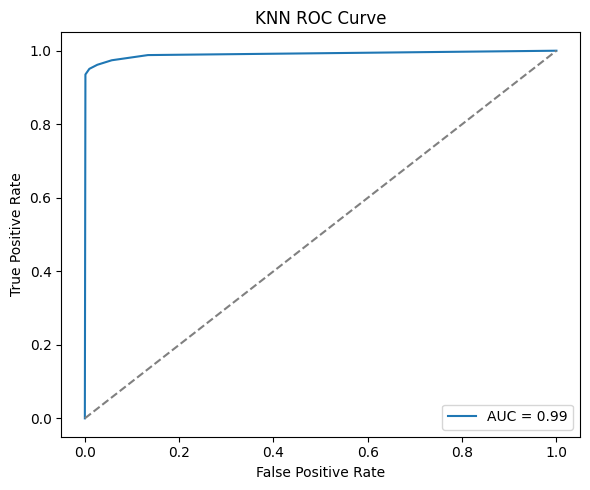

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv("stroke_clean.csv", delimiter=",")

# Features and target
X = df.drop(columns=['stroke'])
y = df['stroke']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-Fold setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Model with 4 hyperparameters
knn = KNeighborsClassifier(
    n_neighbors=5,
    weights='uniform',
    algorithm='auto',
    p=2
)

print("=== KNN Evaluation ===")
print("Hyperparameters:", knn.get_params())

# Cross-validation predictions and accuracy
y_pred = cross_val_predict(knn, X_scaled, y, cv=kf)
print("\nClassification Report:\n", classification_report(y, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y, y_pred))

# Accuracy scores
test_acc = cross_val_score(knn, X_scaled, y, cv=kf)
train_acc = []
for train_idx, test_idx in kf.split(X_scaled):
    knn.fit(X_scaled[train_idx], y[train_idx])
    train_acc.append(knn.score(X_scaled[train_idx], y[train_idx]))

print(f"\nTraining Accuracy: {np.mean(train_acc):.4f}")
print(f"Testing Accuracy:  {np.mean(test_acc):.4f}")

# Confusion Matrix Plot
print("\n=== Confusion Matrix Visualization ===\n")
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# ROC Curve with AUC
print("\n=== ROC Curve Visualization ===\n")
y_prob = cross_val_predict(knn, X_scaled, y, cv=kf, method='predict_proba')[:, 1]
fpr, tpr, thresholds = roc_curve(y, y_prob)
auc_score = roc_auc_score(y, y_prob)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.title("KNN ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()